In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [2]:
data=pd.read_csv('../data/genres_v2.csv',low_memory=False)

In [3]:
data #Son datos de canciones

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo            type  \
0              0.013400    0.0556   0.3890  156.985  audio_features   
1              0.000000    0.1180   0.1240  115.080  audio_features   
2              0.000004    0.3720   0.0391  218.050  audio_features   
3              0.000000    0.1140   0.1750  186.948  audio_features   
4              0.000000    0.1660   0.5910  147.988  audio_features   
...                 ...       ...      ...      ...             ...   
42300          0.000345    0.1210   0.3940  150.013  audio_features   
42301          0.000018    0.2050   0.3830  149.928  audio_features   
42302          0.000242    0.3850   0.1240  154.935  audio_features   
42303          0.029600    0.0575   0.4880  150.042  audio_features   
42304          0.000055    0.4140   0.1340  155.047  audio_features   

                           id                                   uri  \
0      2Vc6NJ9PW9gD9q343XFRKx  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1      7pgJBLVz5VmnL7uGHmRj6p  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2      0vSWgAlfpye0WCGeNmuNhy  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3      0VSXnJqQkwuH2ei1nOQ1nu  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4      4jCeguq9rMTlbMmPHuO7S3  spotify:track:4jCeguq9rMTlbMmPHuO7S3   
...                       ...                                   ...   
42300  46bXU7Sgj7104ZoXxzz9tM  spotify:track:46bXU7Sgj7104ZoXxzz9tM   
42301  0he2ViGMUO3ajKTxLOfWVT  spotify:track:0he2ViGMUO3ajKTxLOfWVT   
42302  72DAt9Lbpy9EUS29OzQLob  spotify:track:72DAt9Lbpy9EUS29OzQLob   
42303  6HXgExFVuE1c3cq9QjFCcU  spotify:track:6HXgExFVuE1c3cq9QjFCcU   
42304  6MAAMZImxcvYhRnxDLTufD  spotify:track:6MAAMZImxcvYhRnxDLTufD   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1      https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2      https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3      https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4      https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   
...                                                  ...   
42300  https://api.spotify.com/v1/tracks/46bXU7Sgj710...   
42301  https://api.spotify.com/v1/tracks/0he2ViGMUO3a...   
42302  https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...   
42303  https://api.spotify.com/v1/tracks/6HXgExFVuE1c...   
42304  https://api.spotify.com/v1/tracks/6MAAMZImxcvY...   

                                            analysis_url  duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
1      https://api.spotify.com/v1/audio-analysis/7pgJ...       224427   
2      https://api.spotify.com/v1/audio-analysis/0vSW...        98821   
3      https://api.spotify.com/v1/audio-analysis/0VSX...       123661   
4      https://api.spotify.com/v1/audio-analysis/4jCe...       123298   
...                                                  ...          ...   
42300  https://api.spotify.com/v1/audio-analysis/46bX...       269208   
42301  https://api.spotify.com/v1/audio-analysi

In [4]:
data.shape

(42305, 22)

In [5]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [6]:
data[['type','genre', 'song_name', 'Unnamed: 0', 'title']] #Indicadores de la cancion o complementarias title y song name
#Queremos clusterizar canciones

type      genre  \
0      audio_features  Dark Trap   
1      audio_features  Dark Trap   
2      audio_features  Dark Trap   
3      audio_features  Dark Trap   
4      audio_features  Dark Trap   
...               ...        ...   
42300  audio_features  hardstyle   
42301  audio_features  hardstyle   
42302  audio_features  hardstyle   
42303  audio_features  hardstyle   
42304  audio_features  hardstyle   

                                           song_name  Unnamed: 0  \
0                                Mercury: Retrograde         NaN   
1                                          Pathology         NaN   
2                                           Symbiote         NaN   
3      ProductOfDrugs (Prod. The Virus and Antidote)         NaN   
4                                              Venom         NaN   
...                                              ...         ...   
42300                                            NaN     20995.0   
42301                                            NaN     20996.0   
42302                                            NaN     20997.0   
42303                                            NaN     20998.0   
42304                                            NaN     20999.0   

                             title  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  
...                            ...  
42300           Euphoric Hardstyle  
42301  Greatest Hardstyle Playlist  
42302       Best of Hardstyle 2020  
42303           Euphoric Hardstyle  
42304       Best of Hardstyle 2020  

[42305 rows x 5 columns]

In [7]:
data['genre'].value_counts(1) #Cluster por genero
#La seleccion de variables dependerá del analisis que se quiera hacer,
#por ejemplo latitud y longitud pueden afectar mucho unos cluster
#el algoritmo regresa ciertos patrones

Underground Rap    0.138872
Dark Trap          0.108214
Hiphop             0.071575
trance             0.070890
trap               0.070606
techhouse          0.070323
dnb                0.070110
psytrance          0.069992
techno             0.069874
hardstyle          0.069401
RnB                0.049616
Trap Metal         0.046236
Rap                0.043683
Emo                0.039712
Pop                0.010897
Name: genre, dtype: float64

In [8]:
data.tempo

0        156.985
1        115.080
2        218.050
3        186.948
4        147.988
          ...   
42300    150.013
42301    149.928
42302    154.935
42303    150.042
42304    155.047
Name: tempo, Length: 42305, dtype: float64

In [9]:
"""Nos quedamos con las variables continuas"""
X=data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']].copy()

In [10]:
from sklearn.preprocessing import MinMaxScaler #Traemos el escalador

In [11]:
import cufflinks as cf
cf.go_offline() #visualizacion

In [15]:
sc = MinMaxScaler()
tsne = TSNE(n_components=2,n_jobs=-1) #Usamos tsne
X_sc= sc.fit_transform(X)
Xt = pd.DataFrame(tsne.fit_transform(X_sc),columns=['d1','d2'])

In [16]:
Xt.iplot(kind='scatter',x='d1',y='d2',mode='markers',size=8) 
#Se crean segmentaciones usando como apoyo

In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

#guardamos los datos escalados
Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)
#Las metricas para determinar el numero de clister es con la silueta y el metodo del codo (solo k-means)
#La silueta se puede usar en ambos dado que mide maxima cohesion y maxima
#separacion

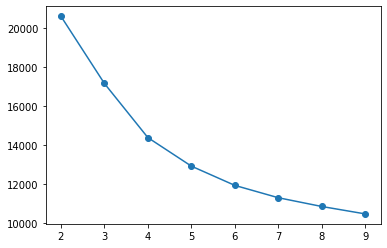

In [18]:
l = []
for k in range(2,10):
    km = KMeans(n_clusters=k,max_iter=100) #kmeans
    km.fit(Xs)
    l.append((k,km.inertia_))
inercia = pd.DataFrame(l,columns=['k','inercia'])
#graficamos la inercia
plt.plot(inercia['k'],inercia['inercia'],marker='o')
#no se ve la torcion muy clara

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

In [20]:
ls = []
for k in range(2,10):
    print(k)
    
    gm = GaussianMixture(n_components=k,covariance_type='spherical')
 #calcula el promedio de las siluetas   
    gm.fit(Xs)
    ls.append((k,silhouette_score(Xs,gm.predict(Xs))))
#la silueta toma valores de -1 a 1, entre mas cerca a uno mejor

2
3
4
5
6
7
8
9


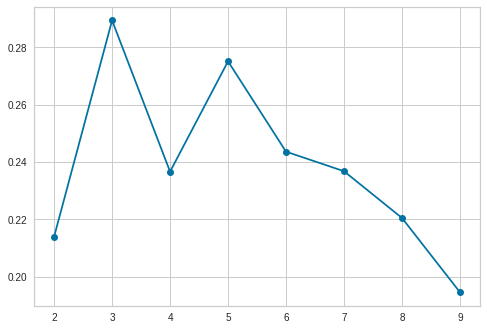

In [21]:
silueta = pd.DataFrame(ls,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')
#3 componentes es lo mejor, como no es cercano a uno, quiere decir que
#dificil separar los cluster

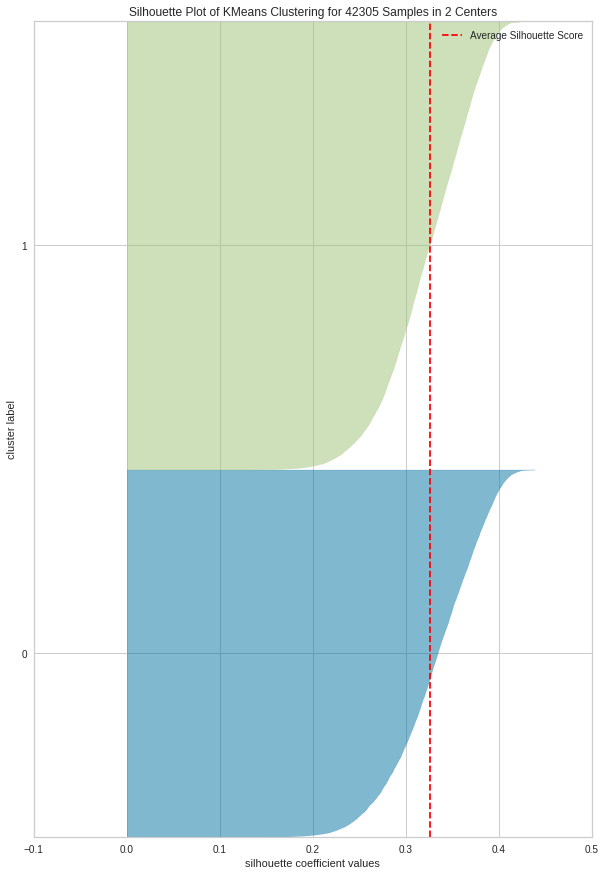

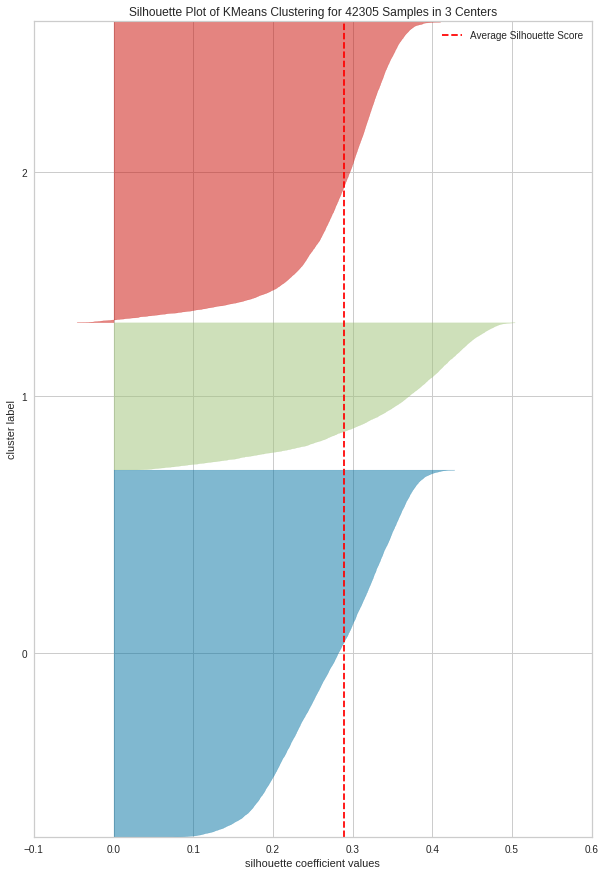

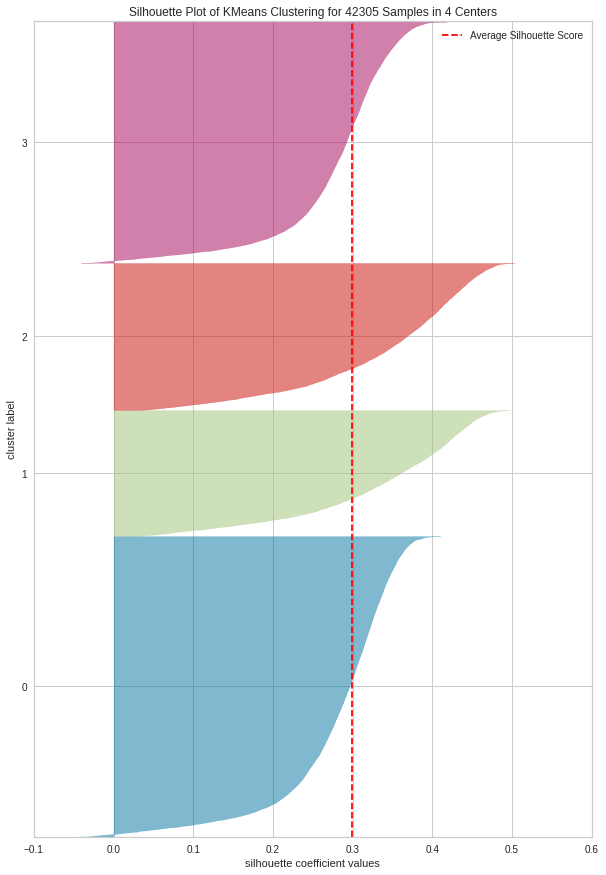

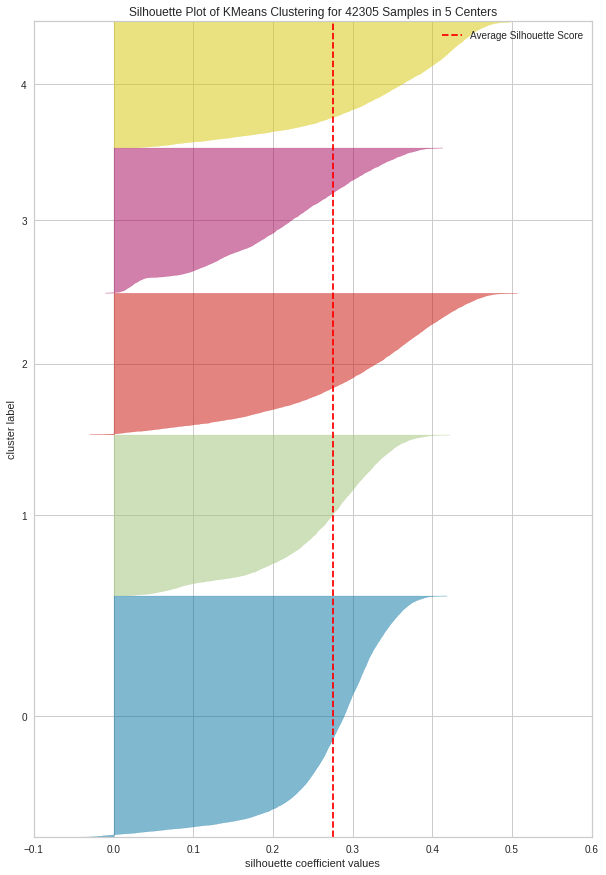

In [29]:
for j,i in enumerate([2, 3, 4, 5]):
    fig, ax = plt.subplots(figsize=(10,15))
    km = KMeans(n_clusters=i,)
    visualizer = SilhouetteVisualizer(km,ax=ax, colors='yellowbrick',)
    visualizer.fit(Xs)
    visualizer.show()
    
#queremos grupos uniformes y cercanos a 1
#k=2 es mas alto, despues va el 4

In [22]:
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k)
    km.fit(Xs.sample(frac=.1))
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

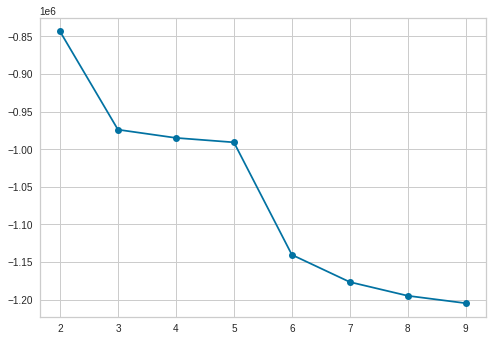

In [23]:
plt.plot(aic['k'],aic['aic'],marker='o')
#9 grupos

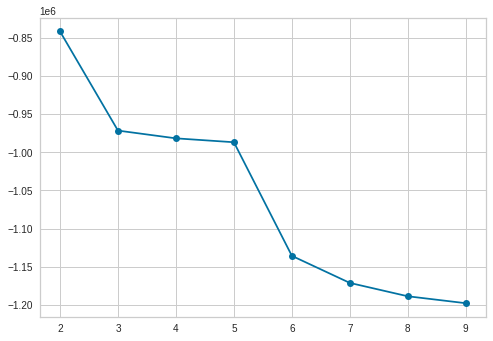

In [24]:
plt.plot(bic['k'],bic['bic'],marker='o')
#9 grupos

Podemos contrastar distintas conf de algoritmos para ver cual es mejor. Poner en consideracion el # de grupos que podamos manejar para el perfilamiento

In [25]:
gmm_4= GaussianMixture(n_components=4) #datos generados por 4 dist gausseanas

In [26]:
kmm_4= KMeans(n_clusters=4)
#el fit para k-means se hace todo el algoritmo

In [27]:
gmm_8=GaussianMixture(n_components=8)

In [28]:
gmm_4.fit(Xs) #estima los parametros de las distribuciones

GaussianMixture(n_components=4)

In [29]:
gmm_8.fit(Xs)

GaussianMixture(n_components=8)

In [30]:
data['cl_gmm4'] = gmm_4.predict(Xs)

In [31]:
data['cl_gmm8'] = gmm_8.predict(Xs)

In [32]:
data['cl_km4'] = kmm_4.fit_predict(Xs) #se hace la prediccion

In [33]:
import cufflinks as cf
cf.go_offline()

In [34]:
data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo            type  \
0              0.013400    0.0556   0.3890  156.985  audio_features   
1              0.000000    0.1180   0.1240  115.080  audio_features   
2              0.000004    0.3720   0.0391  218.050  audio_features   
3              0.000000    0.1140   0.1750  186.948  audio_features   
4              0.000000    0.1660   0.5910  147.988  audio_features   
...                 ...       ...      ...      ...             ...   
42300          0.000345    0.1210   0.3940  150.013  audio_features   
42301          0.000018    0.2050   0.3830  149.928  audio_features   
42302          0.000242    0.3850   0.1240  154.935  audio_features   
42303          0.029600    0.0575   0.4880  150.042  audio_features   
42304          0.000055    0.4140   0.1340  155.047  audio_features   

                           id                                   uri  \
0      2Vc6NJ9PW9gD9q343XFRKx  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1      7pgJBLVz5VmnL7uGHmRj6p  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2      0vSWgAlfpye0WCGeNmuNhy  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3      0VSXnJqQkwuH2ei1nOQ1nu  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4      4jCeguq9rMTlbMmPHuO7S3  spotify:track:4jCeguq9rMTlbMmPHuO7S3   
...                       ...                                   ...   
42300  46bXU7Sgj7104ZoXxzz9tM  spotify:track:46bXU7Sgj7104ZoXxzz9tM   
42301  0he2ViGMUO3ajKTxLOfWVT  spotify:track:0he2ViGMUO3ajKTxLOfWVT   
42302  72DAt9Lbpy9EUS29OzQLob  spotify:track:72DAt9Lbpy9EUS29OzQLob   
42303  6HXgExFVuE1c3cq9QjFCcU  spotify:track:6HXgExFVuE1c3cq9QjFCcU   
42304  6MAAMZImxcvYhRnxDLTufD  spotify:track:6MAAMZImxcvYhRnxDLTufD   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1      https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2      https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3      https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4      https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   
...                                                  ...   
42300  https://api.spotify.com/v1/tracks/46bXU7Sgj710...   
42301  https://api.spotify.com/v1/tracks/0he2ViGMUO3a...   
42302  https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...   
42303  https://api.spotify.com/v1/tracks/6HXgExFVuE1c...   
42304  https://api.spotify.com/v1/tracks/6MAAMZImxcvY...   

                                            analysis_url  duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
1      https://api.spotify.com/v1/audio-analysis/7pgJ...       224427   
2      https://api.spotify.com/v1/audio-analysis/0vSW...        98821   
3      https://api.spotify.com/v1/audio-analysis/0VSX...       123661   
4      https://api.spotify.com/v1/audio-analysis/4jCe...       123298   
...                                                  ...          ...   
42300  https://api.spotify.com/v1/audio-analysis/46bX...       269208   
42301  https://api.spotify.com/v1/audio-analysi

<AxesSubplot:ylabel='cl_km4'>

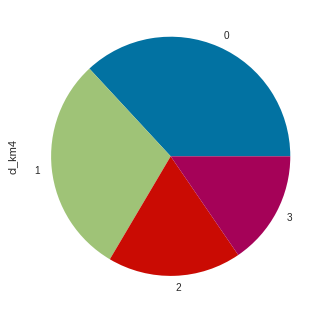

In [35]:
data['cl_km4'].value_counts().plot(kind='pie') #proporciones

<AxesSubplot:ylabel='cl_gmm8'>

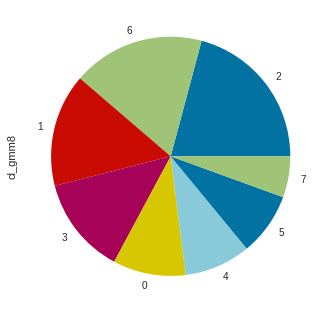

In [36]:
data['cl_gmm8'].value_counts().plot(kind='pie') #8 se ven bien

<AxesSubplot:ylabel='cl_gmm4'>

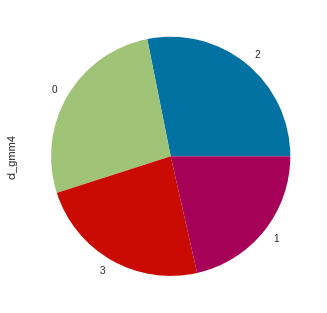

In [37]:
data['cl_gmm4'].value_counts().plot(kind='pie') #es el que se ve mejor en distribucion
#no necesariamente quiere decir que sea el mejor, falta el perfilamiento

In [38]:
Xt['cl_gmm4']=data['cl_gmm4'].astype(str)

In [39]:
Xt.iplot(kind='scatter',x='d1',y='d2',mode='markers',size=8, categories='cl_gmm4')
#Vemos la vis del gausseano con 4 grupos
#ver en 3d puede ayudar a ver si no hay mucho traslape como en 2d

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [40]:
"""Hacemos el perfilamiento"""
for feature in ['cl_km4','cl_gmm8','cl_gmm4']:
    print(feature)
    display(data.groupby(feature).mean().style.background_gradient(cmap='Blues'))

cl_km4


cl_gmm8


cl_gmm4


Lo que toma la decision es el perfilamiento que se haga
Como hay 15 generos puede ser que se estabilicen y puede ser la div que se hace. Con mas grupos es más dificil de hacer el perfilamiento.

Se busca un equilibrio de no tener tantos grupos

Nota: tener cuidado que no se pasen variables que no se usen.

Con perfilamiento queremos una varibale que separe a los grupos

Si se encuentran dos grupos que no se separan muy bien podrian formar uno solo.

Un cluster va a estar mal cuando se meta una variable que no deberia ir.